# **Customer Churn**
---

## **1. Introduction**
The goal of this project is to build a classification model to predict whether a customer will exit or not, based on their historical data. 

---

## **2. Data Description**
The dataset contains the following columns:

| Column Name         | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| `RowNumber`         | Row index of the dataset                                                                        |
| `CustomerId`        | Unique identifier for a customer                                                               |
| `Surname`           | Customer's last name                                                                           |
| `CreditScore`       | Credit score of the customer                                                                   |
| `Geography`         | Country of residence                                                                           |
| `Gender`            | Gender of the customer                                                                         |
| `Age`               | Age of the customer                                                                            |
| `Tenure`            | Number of years the customer has been associated with the bank                                 |
| `Balance`           | Bank balance of the customer                                                                   |
| `NumOfProducts`     | Number of bank products held by the customer                                                   |
| `HasCrCard`         | Indicates whether the customer has a credit card (1 = Yes, 0 = No)                            |
| `IsActiveMember`    | Indicates whether the customer is an active member (1 = Yes, 0 = No)                           |
| `EstimatedSalary`   | Estimated yearly salary of the customer                                                        |
| `Exited`            | Target variable (1 = Customer exited, 0 = Customer did not exit)                               |

---

## **3. Steps to Perform**
1. **Load the Dataset**
   - Import necessary libraries.
   - Load the dataset into a Pandas DataFrame.
   - Display the first few rows to understand its structure.

2. **Exploratory Data Analysis (EDA)**
   - Perform basic statistics and check for missing values.
   - Visualize the data distributions using plots (e.g., histograms, boxplots).
   - Analyze the relationships between features and the target variable (`Exited`).

3. **Data Preprocessing**
   - Encode categorical variables like `Geography` and `Gender`.
   - Scale numerical features to ensure consistent units.
   - Split the data into training and testing sets.

4. **Build the Model**
   - Use logistic regression for classification.
   - Train the model on the training data.

5. **Evaluate the Model**
   - Evaluate the model using metrics like accuracy, precision, recall, and F1 score.
   - Check the precision for both classes and calculate the mean precision score.

6. **Make Predictions**
   - Predict the target variable (`Exited`) for test data.
   - Save the predictions into a CSV file with the specified format.

---


In [31]:
## Import required libraries ##

In [32]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [35]:
## Loading Data ##

In [36]:
df = pd.read_csv('customer_churn.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [37]:
## Undertanding the data ##

In [38]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (10000, 14)


In [39]:
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
print("\nDataset Columns:")
df.columns


Dataset Columns:


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### **Dataset Overview**
The dataset contains **10,000 rows** and **14 columns**, as described below:

- **Data Types:**
  - **`int64` (9 columns):** Numerical columns with integer values (e.g., `RowNumber`, `CustomerId`, `Age`).
  - **`float64` (2 columns):** Numerical columns with decimal values (e.g., `Balance`, `EstimatedSalary`).
  - **`object` (3 columns):** Categorical columns (e.g., `Surname`, `Geography`, `Gender`).

- **Non-Null Count:** 
  All columns have **10,000 non-null values**, indicating there are no missing values in the dataset.

---


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
print("\nCheck for duplicate rows in the dataset:")
df.duplicated().sum()


Check for duplicate rows in the dataset:


0

In [44]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [45]:
print("Converting 'HasCrCard' and 'IsActiveMember' from 0/1 to 'No'/'Yes'...")
df["IsActiveMember"]= df["IsActiveMember"].map({0: "No", 1: "Yes"})
df['IsActiveMember'] = df['IsActiveMember'].astype(str)

df["HasCrCard"]= df["HasCrCard"].map({0: "No", 1: "Yes"})
df['HasCrCard'] = df['HasCrCard'].astype(str)

df["Exited"]= df["Exited"].map({0: "No", 1: "Yes"})
df['Exited'] = df['Exited'].astype(str)

Converting 'HasCrCard' and 'IsActiveMember' from 0/1 to 'No'/'Yes'...


In [46]:
## Statistical Overview ##

## **Statistical Description of the Dataset**

In [48]:
print("\nStatistical Description:")
print(df.describe())


Statistical Description:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.58000

## **Categorical Description of the Dataset**
- **Geography:** France has the highest representation.
- **Gender:** Males make up the majority of the dataset. 
- **Exited Rate**: Only about 20% of the customers have exited, indicating a relatively low churn rate.
- **IsActiveMember**: more than 50% of customers are active members.
- **HasCrCard**: more than 70% of customers have a credit card .


In [50]:
df.describe(include='object')

,Surname,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000
unique,2932,3,2,2,2,2
top,Smith,France,Male,Yes,Yes,No
freq,32,5014,5457,7055,5151,7963


In [51]:
# List of categorical columns

categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# List of numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [52]:
def print_value_counts(df, columns):
    for col in columns:
        print(f"Value counts for '{col}':")
        print(df[col].value_counts())
        print("\n" + "="*50 + "\n")

print_value_counts(df, categorical_cols)

Value counts for 'Geography':
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Value counts for 'Gender':
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Value counts for 'HasCrCard':
HasCrCard
Yes    7055
No     2945
Name: count, dtype: int64


Value counts for 'IsActiveMember':
IsActiveMember
Yes    5151
No     4849
Name: count, dtype: int64


Value counts for 'Exited':
Exited
No     7963
Yes    2037
Name: count, dtype: int64




## Data Manipulation ##

In [54]:
print("Dropped unused columns ('RowNumber', 'CustomerId', and 'Surname') because they are not necessary for the model.")
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head(1)

Dropped unused columns ('RowNumber', 'CustomerId', and 'Surname') because they are not necessary for the model.


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,Yes,Yes,101348.88,Yes


## Data Visualization ## 

In [56]:
# Function to plot histograms for numerical columns
def plot_histograms(df, numerical_cols):
    """
    Plot histograms for numerical columns.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing data.
    numerical_cols (list): List of numerical column names.
    """
    print("Plotting histograms for numerical columns...")
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Function to plot box plots for numerical columns
def plot_box_plots(df, numerical_cols):
    """
    Plot box plots for numerical columns.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing data.
    numerical_cols (list): List of numerical column names.
    """
    print("Plotting box plots for numerical columns...")
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f'{col} Box Plot')
    plt.tight_layout()
    plt.show()


### Histograms
- **CreditScore**:
  - A near-normal distribution.
- **Age**:
  - Skewed towards younger ages (20-50 years).
  - Few samples in older age groups.
- **Tenure**:
  - Uniform distribution  ???? ( what is should do?)
- **Balance**:
  - Skewed heavily to the left due to many zero values.???? ( what is should do?)
- **NumOfProducts**:
  - ???? ( what is should do?)
- **EstimatedSalary**:
  - Uniformly distributed.???? ( what is should do?)



Plotting histograms for numerical columns...


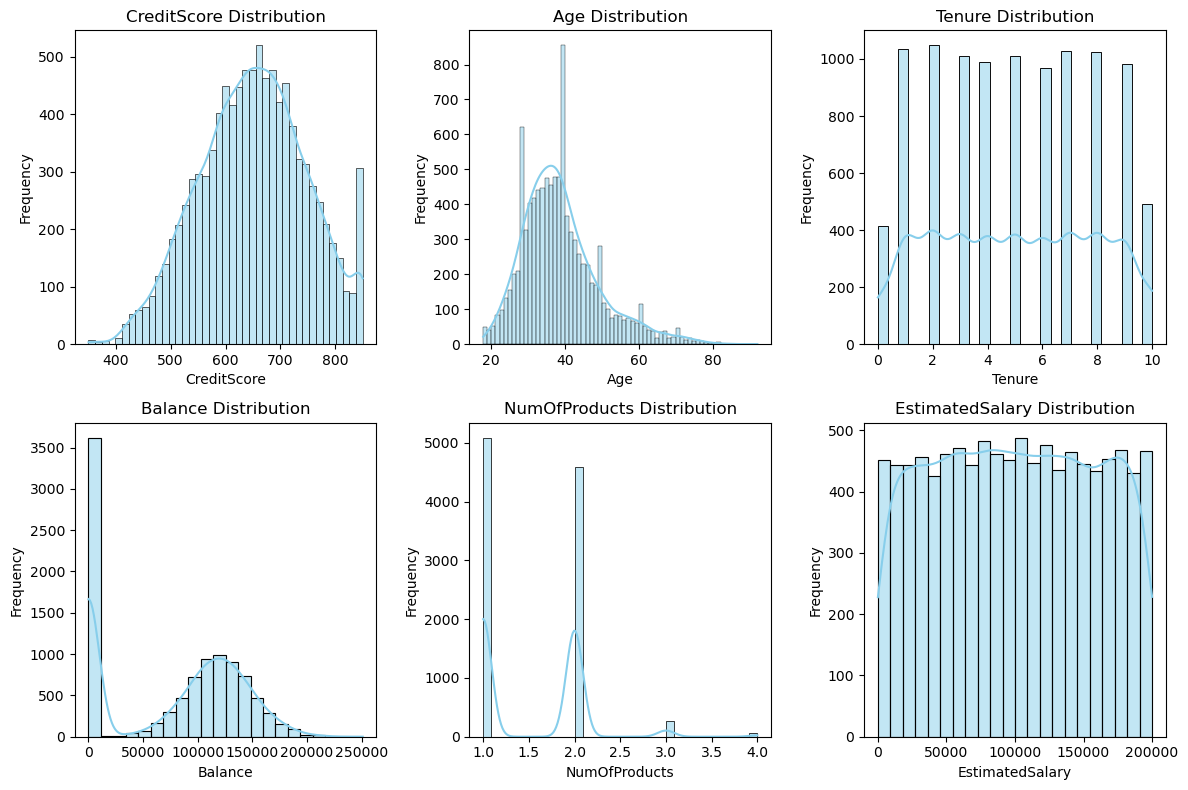

In [58]:
plot_histograms(df, numerical_cols)

## box plots ## 

- **CreditScore**:
  - The majority of values lie between 600 and 750.
  - Some outliers are observed on the lower side.
- **Age**:
  - Values are concentrated around 30-50 years.
  - There are many high outliers for individuals above 60 years.
- **Tenure**:
  - Fairly uniform distribution without outliers.
- **Balance**:
  - ????.
- **NumOfProducts**:
  - ????.
- **EstimatedSalary**:
  - Well-distributed without outliers.

**Actionable Steps**:
1. Handle outliers (e.g., using capping or IQR techniques).
2. Investigate zero values in the **Balance** column to ensure they are meaningful and not missing data.



Plotting box plots for numerical columns...


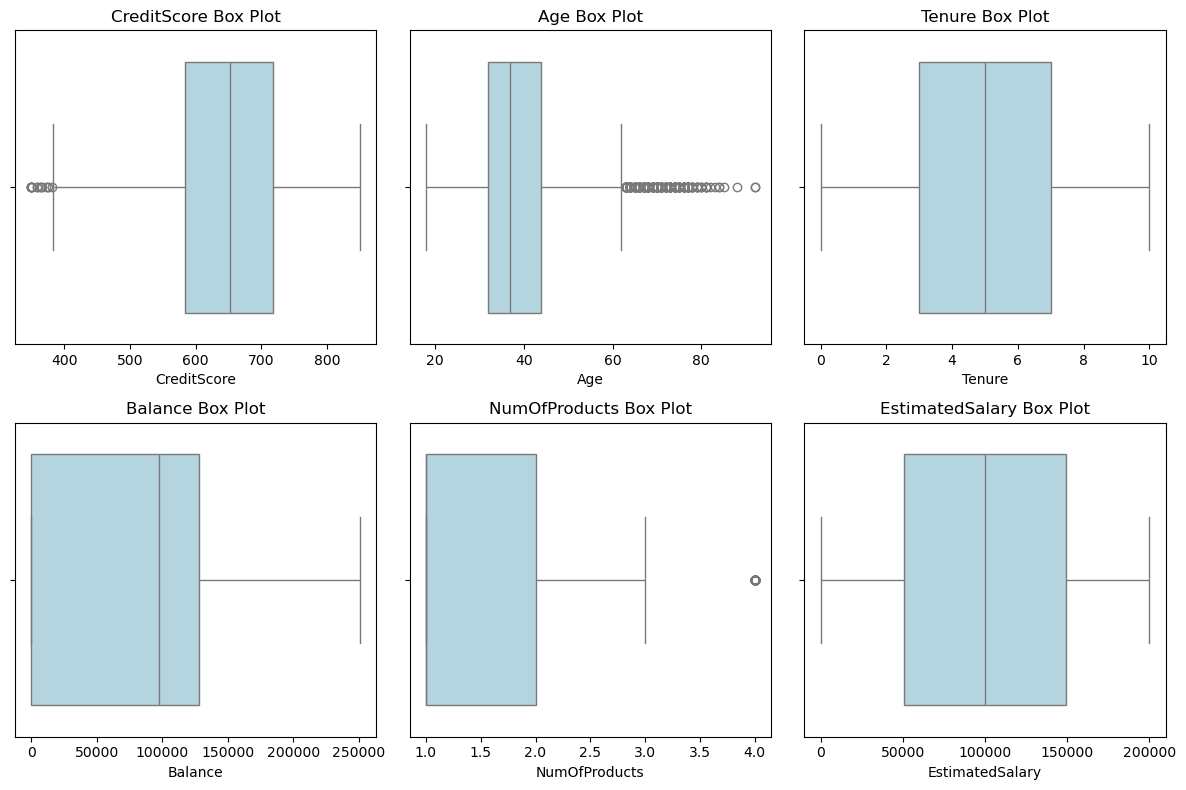

In [60]:
plot_box_plots(df, numerical_cols)

Plotting bar charts for categorical columns in a grid...


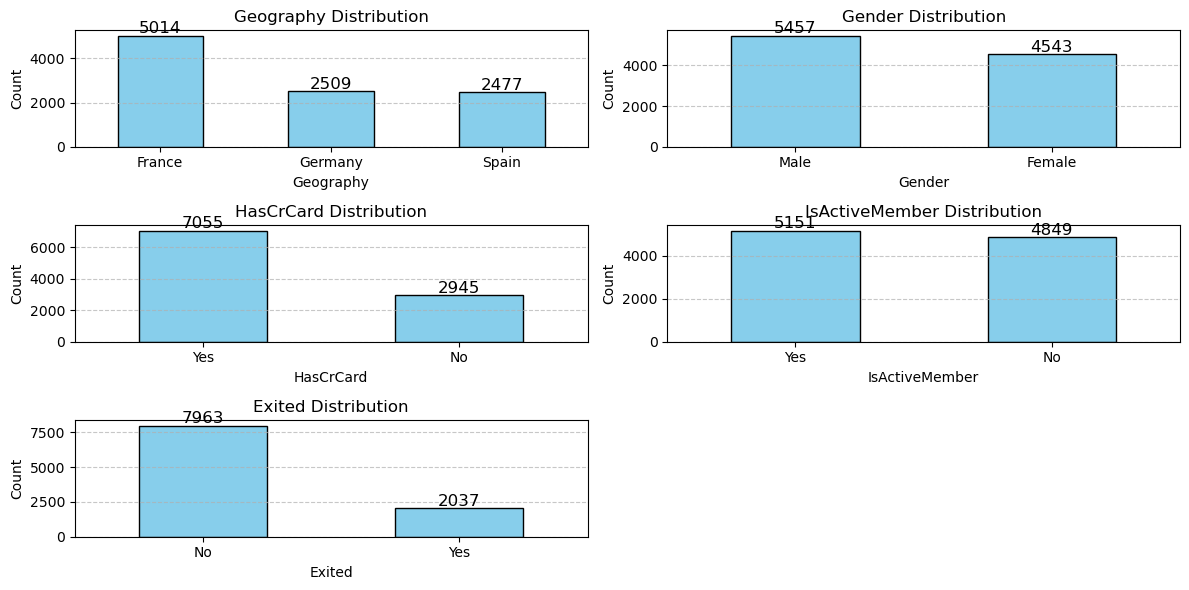

In [61]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, categorical_columns):
    """
    Function to plot bar graphs for categorical columns distributions with count annotations in a grid.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing categorical columns.
    categorical_columns (list): List of categorical column names to plot.
    """
    num_plots = len(categorical_columns)
    cols = 2  # Set number of columns in grid
    rows = (num_plots + 1) // cols  # Calculate number of rows needed for the grid
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, col in enumerate(categorical_columns):
        # Get the count of each category in the column
        column_counts = data[col].value_counts()

        # Create the bar plot for the categorical distribution
        ax = axes[i]
        column_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=0)

        # Annotate counts on top of each bar
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

    # Remove any empty subplots if the number of plots is less than the grid size
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

print("Plotting bar charts for categorical columns in a grid...")
plot_categorical_distribution(df, categorical_cols)


Plotting donut charts for categorical columns in a grid...


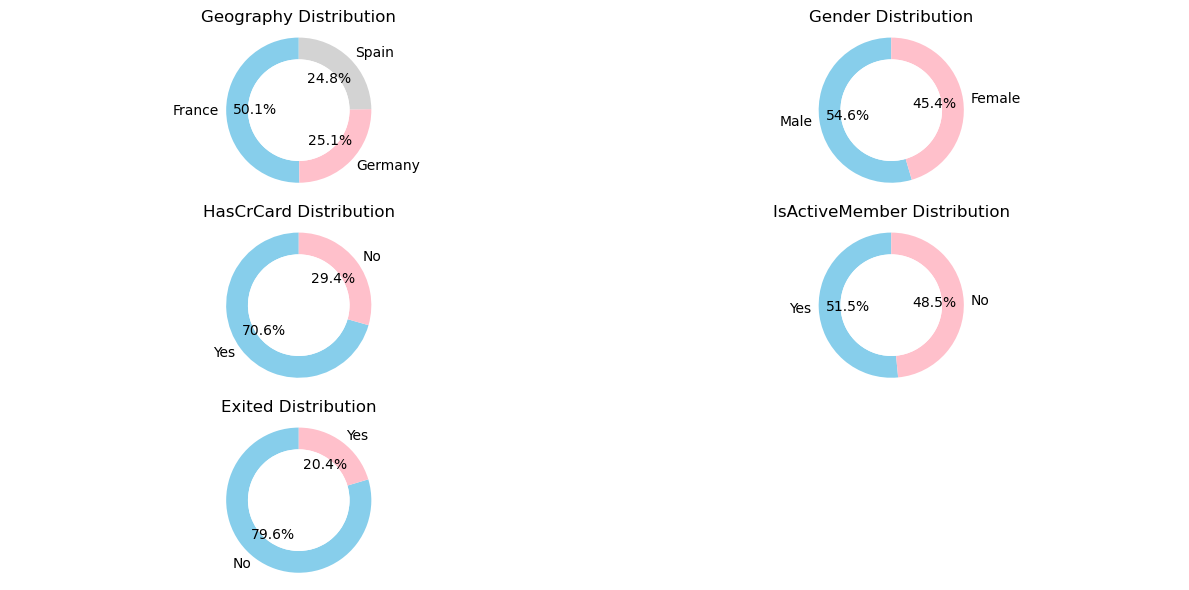

In [62]:
import matplotlib.pyplot as plt

def plot_categorical_distribution_donut(data, categorical_columns):
    """
    Function to plot donut charts for categorical columns distributions with count annotations in a grid.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the categorical columns.
    categorical_columns (list): List of categorical column names to plot.
    """
    num_plots = len(categorical_columns)
    cols = 2  # Set number of columns in grid
    rows = (num_plots + 1) // cols  # Calculate number of rows needed for the grid
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, col in enumerate(categorical_columns):
        # Get the count of each category in the column
        column_counts = data[col].value_counts()

        # Create the donut chart
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', 
                                           startangle=90, colors=['skyblue', 'pink', 'lightgray'], 
                                           wedgeprops={'width': 0.3})

        # Draw a circle in the center for the donut shape
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        ax.add_artist(centre_circle)
        
        # Title and display settings
        ax.set_title(f'{col} Distribution')
        ax.axis('equal')  # Equal aspect ratio ensures the chart is drawn as a circle.

        # Style the labels and autotext
        for autotext in autotexts:
            autotext.set_fontsize(10)
            autotext.set_color('black')

    # Remove any empty subplots if the number of plots is less than the grid size
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

print("Plotting donut charts for categorical columns in a grid...")
plot_categorical_distribution_donut(df, categorical_cols)


## Label 'Exited' distribution ##  

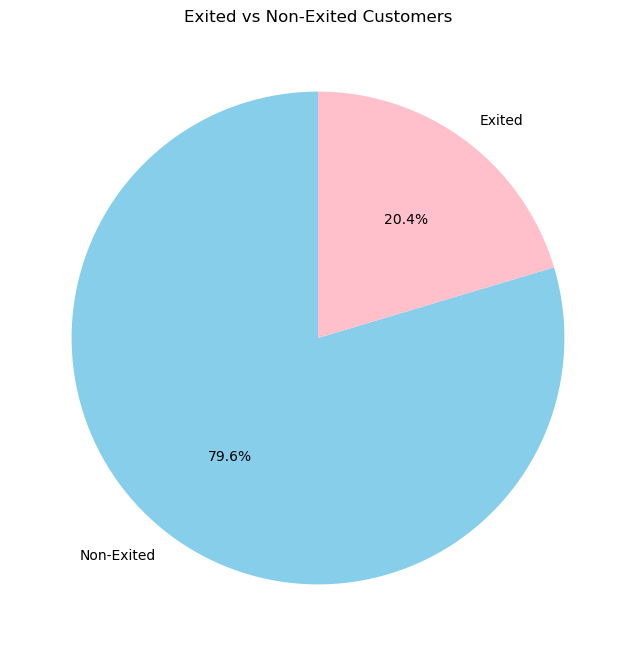

In [64]:
def plot_exited_distribution(data):
    exited_count = data['Exited'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(exited_count, labels=['Non-Exited', 'Exited'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
    plt.title('Exited vs Non-Exited Customers')
    plt.show()

plot_exited_distribution(df)

In [65]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,Yes,Yes,101348.88,Yes


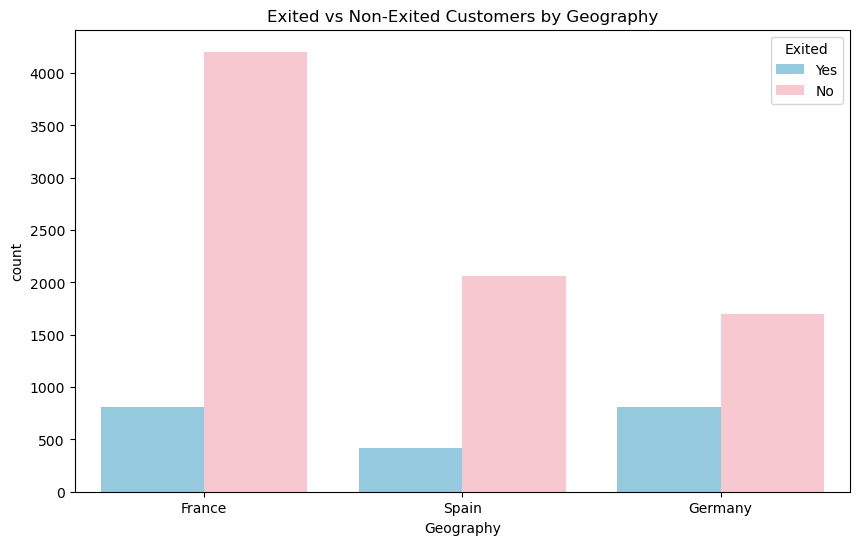

In [66]:
def plot_exited_by_geography(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Geography', hue='Exited', palette=['skyblue', 'pink'])
    plt.title('Exited vs Non-Exited Customers by Geography')
    plt.show()

plot_exited_by_geography(df)

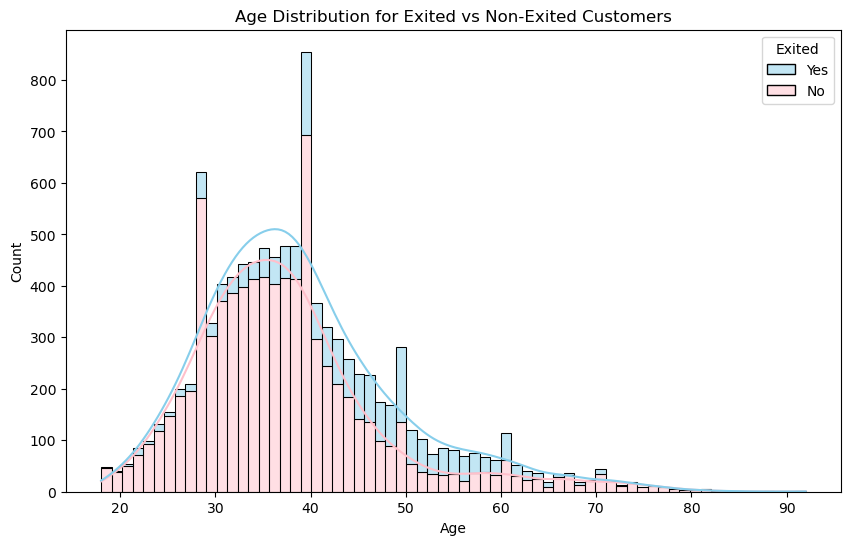

In [67]:
def plot_age_distribution_by_exited(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Age', hue='Exited', multiple='stack', kde=True, palette=['skyblue', 'pink'])
    plt.title('Age Distribution for Exited vs Non-Exited Customers')
    plt.show()
plot_age_distribution_by_exited(df)

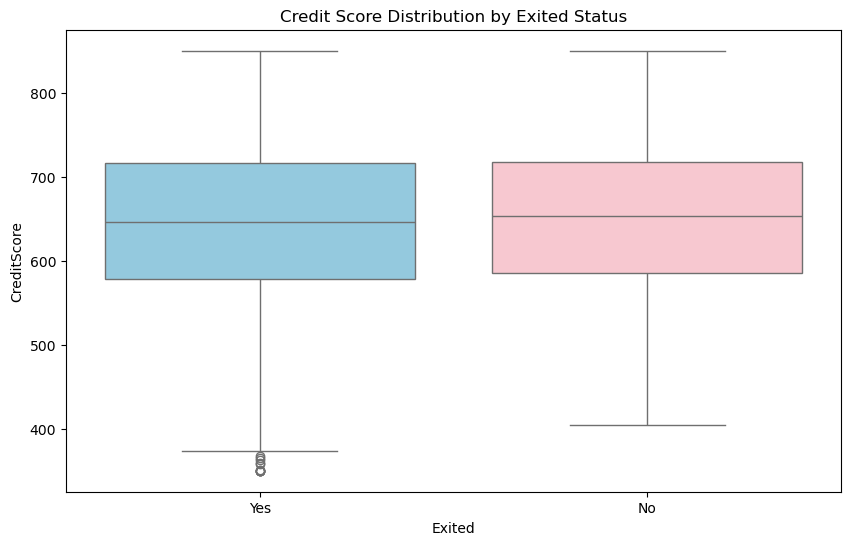

In [68]:
def plot_credit_score_vs_churn(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Exited', y='CreditScore', palette=['skyblue', 'pink'])
    plt.title('Credit Score Distribution by Exited Status')
    plt.show()
plot_credit_score_vs_churn(df)

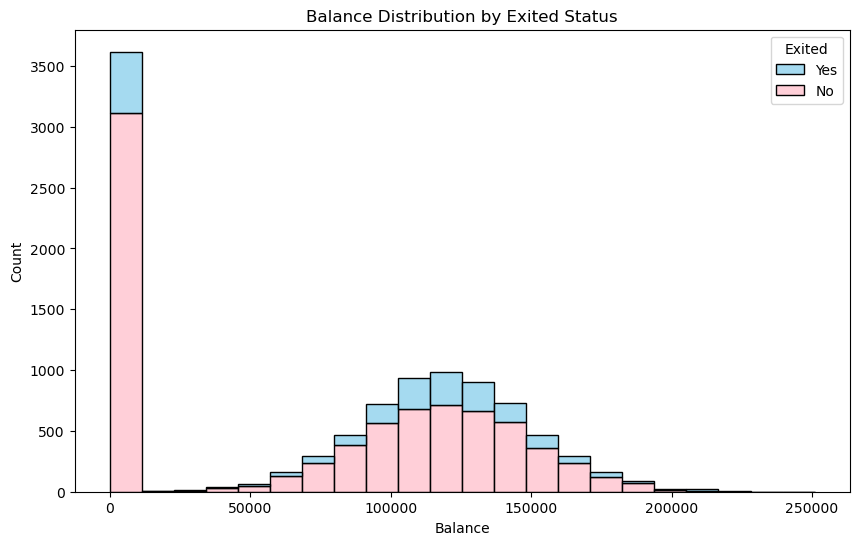

In [69]:
def plot_balance_distribution_by_churn(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Balance', hue='Exited', multiple="stack", palette=['skyblue', 'pink'])
    plt.title('Balance Distribution by Exited Status')
    plt.show()
plot_balance_distribution_by_churn(df)

## Feature Encoding ##

In [71]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, categorical_cols):
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    return df

df_encoded = label_encode_columns(df, categorical_cols)

## Correlation Heatmap ##

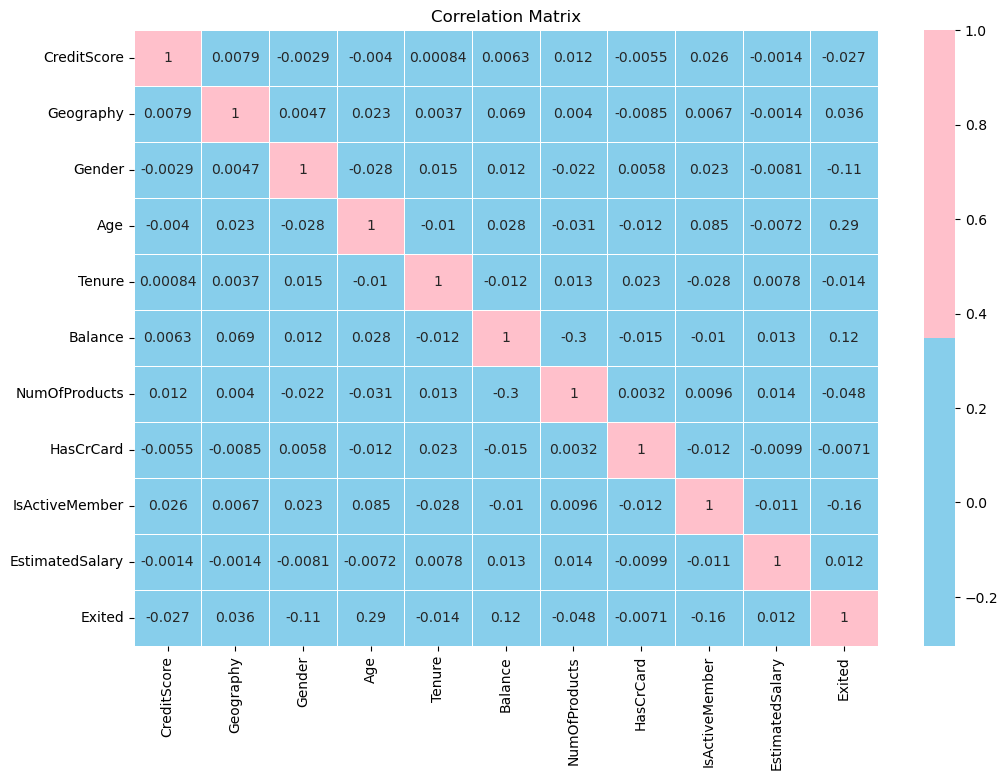

In [73]:
def plot_correlation_heatmap(df):
    # Calculate the correlation matrix
    correlation = df.corr()

    # Custom color palette
    custom_palette = sns.color_palette(["skyblue", "pink"])

    # Plotting the heatmap with the custom palette
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap=sns.color_palette(custom_palette), linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_heatmap(df)


## Split Data ##

In [75]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling ## 

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize the estimators ##

In [79]:

class ModelEvaluator:
    def __init__(self, model, param_grid):
        self.model = model
        self.param_grid = param_grid
        self.grid_search = None

    def tune_model(self, X_train, y_train):
        self.grid_search = GridSearchCV(self.model, self.param_grid, cv=5, scoring='accuracy')
        self.grid_search.fit(X_train, y_train)
        return self.grid_search.best_estimator_

    def evaluate(self, X_test, y_test):
        y_pred = self.grid_search.best_estimator_.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }

class LogisticRegressionEvaluator(ModelEvaluator):
    def __init__(self):
        log_reg = LogisticRegression()
        param_log_reg = {
            'C': [1.0, 10, 100]  # Regularization parameter
        }
        super().__init__(log_reg, param_log_reg)

class KNNClassifierEvaluator(ModelEvaluator):
    def __init__(self):
        knn = KNeighborsClassifier()
        param_knn = {
            'n_neighbors': [5, 7, 10],  # Number of neighbors
            'weights': ['uniform', 'distance'],  # Weight function
        }
        super().__init__(knn, param_knn)

class RandomForestEvaluator(ModelEvaluator):
    def __init__(self):
        random_forest = RandomForestClassifier()
        param_rf = {
            'n_estimators': [10, 50, 100],  # Number of trees in the forest
            'max_depth': [3, 5],  # Maximum depth of each tree
        }
        super().__init__(random_forest, param_rf)


In [89]:
#Step1:Initialize each model
log_reg_evaluator = LogisticRegressionEvaluator()
knn_evaluator = KNNClassifierEvaluator()
rf_evaluator = RandomForestEvaluator()

In [121]:
#Step3: Run each model
# Evaluating each model
log_reg_evaluator.tune_model(X_train_scaled, y_train)
log_reg_metrics = log_reg_evaluator.evaluate(X_test_scaled, y_test)

knn_evaluator.tune_model(X_train_scaled, y_train)
knn_metrics = knn_evaluator.evaluate(X_test_scaled, y_test)

rf_evaluator.tune_model(X_train_scaled, y_train)
rf_metrics = rf_evaluator.evaluate(X_test_scaled, y_test)


In [103]:
from tabulate import tabulate
#Step4: Print out the evaluation results for each model
# Collecting the metrics into a list of dictionaries
metrics_data = [
    {"Model": "Logistic Regression", "Accuracy": log_reg_metrics['accuracy'], "Precision": log_reg_metrics['precision'],
     "Recall": log_reg_metrics['recall'], "F1-Score": log_reg_metrics['f1_score'], "ROC AUC": log_reg_metrics['roc_auc']},
    {"Model": "KNN", "Accuracy": knn_metrics['accuracy'], "Precision": knn_metrics['precision'],
     "Recall": knn_metrics['recall'], "F1-Score": knn_metrics['f1_score'], "ROC AUC": knn_metrics['roc_auc']},
    {"Model": "Random Forest", "Accuracy": rf_metrics['accuracy'], "Precision": rf_metrics['precision'],
     "Recall": rf_metrics['recall'], "F1-Score": rf_metrics['f1_score'], "ROC AUC": rf_metrics['roc_auc']}
]

# Print the metrics in a tabular format
print(tabulate(metrics_data, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))


╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Logistic Regression │     0.8155 │      0.6000 │   0.1832 │     0.2807 │    0.5767 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ KNN                 │     0.8470 │      0.7101 │   0.3740 │     0.4900 │    0.6684 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Random Forest       │     0.8565 │      0.7789 │   0.3766 │     0.5077 │    0.6752 │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╧═══════════╛


## 💾 Saving the model ##

In [105]:
import joblib

In [127]:
my_model = rf_evaluator.model
my_model.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
joblib.dump(my_model, 'customer_churn_classification_model.p')

['customer_churn_classification_model.p']

## Model predictions and performance evaluation ## 

In [137]:
# Model predictions and performance evaluation
y_pred = my_model.predict(X_test)

In [141]:
# Accuracy Score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy Score: 0.865

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



## Confusion Matrix ## 

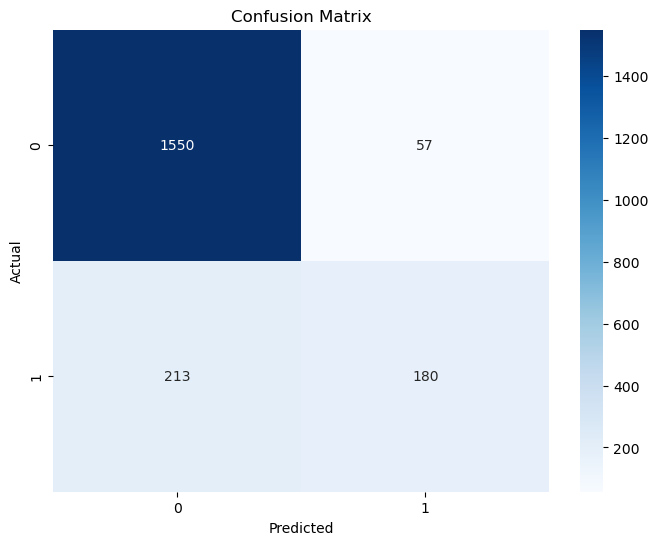

In [135]:

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()